## Import Libs

In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np # multi-dimensional arrays and matrices and mathematical functions to operate on these arrays.
import matplotlib.pyplot as plt #plotting library

## Retrieve the data 

In [2]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv('Salary_Data.csv')

In [5]:
# Voir les 5 premières instances
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
# Voir les informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Preparing the data

In [7]:
# Sélectionner les colonnes "YearsExperience" comme variables d'entrée
# et la colonne "Salary" comme variable cible
X = data[['YearsExperience']]
y = data['Salary']

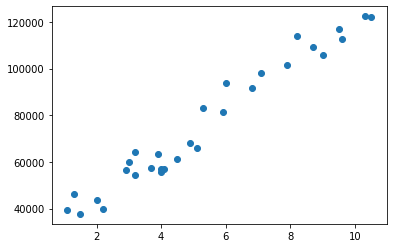

In [8]:
# Mettre les points sur un graphique
plt.scatter(X,y)

In [9]:
# Séparer la dataset en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

## Build and train a model

In [18]:
# Importer la librairie LinearRegression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 4, weights="distance") # Instancier

In [19]:
knn.fit(X_train,y_train) # Entraînement = produire l'équation linéaire

KNeighborsRegressor(n_neighbors=4, weights='distance')

## Evaluate

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [20]:
# Prédictions sur la base test
y_predict = knn.predict(X_test)

In [21]:
# Métrique
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R²:', metrics.r2_score(y_test, y_predict))

MAE: 4210.28730104754
MSE: 26268453.897357505
RMSE: 5125.275982555233
R²: 0.9686611139645416


In [14]:
NewData = [[5],[7]]
NewTest = pd.DataFrame(NewData,columns=['New Data'])
y_new = knn.predict(NewTest)
y_new

C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- New Data
Feature names seen at fit time, yet now missing:
- YearsExperience

  warnings.warn(message, FutureWarning)


array([66449.63636364, 95960.        ])

C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Salary')

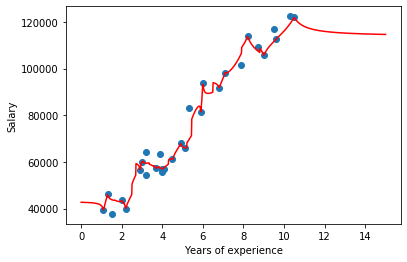

In [15]:
# Ajouter sur le graphique la droite
ordonne = np.linspace(0,15,1000)
plt.scatter(X,y)
plt.plot(ordonne,knn.predict(pd.DataFrame(ordonne)),color='r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

## Best value of K

In [16]:
vect_error = []

for k in range (1,10):
    KNN = KNeighborsRegressor(n_neighbors = k, weights="distance")
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #= somme des mauvaises prédictions / somme des prédictions
    vect_error.append(error)

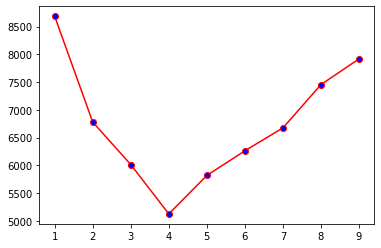

In [17]:
plt.plot(range(1,10),vect_error,marker = 'o', color = 'red', markerfacecolor='blue')